In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn import metrics
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import decimal
import itertools
heart= pd.read_csv('heart.csv')

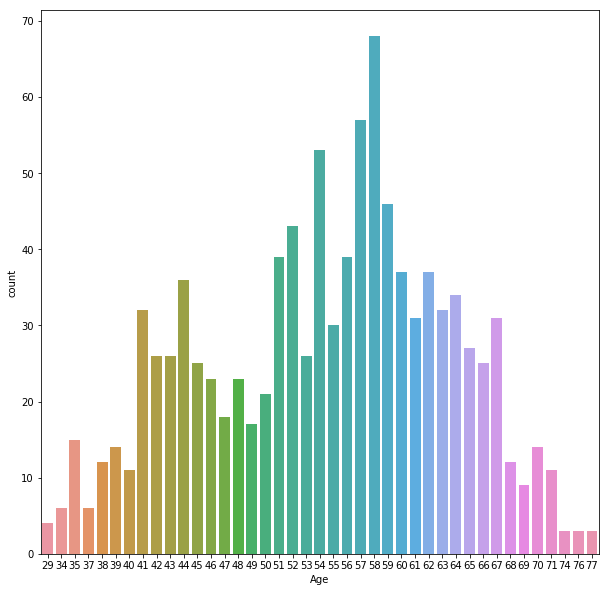

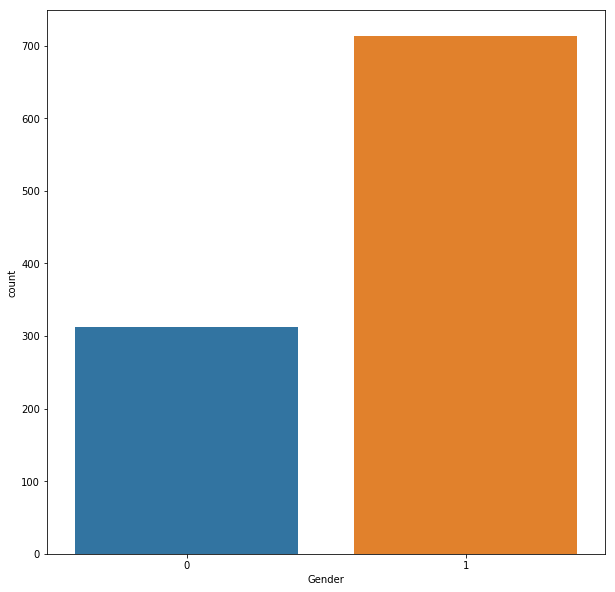

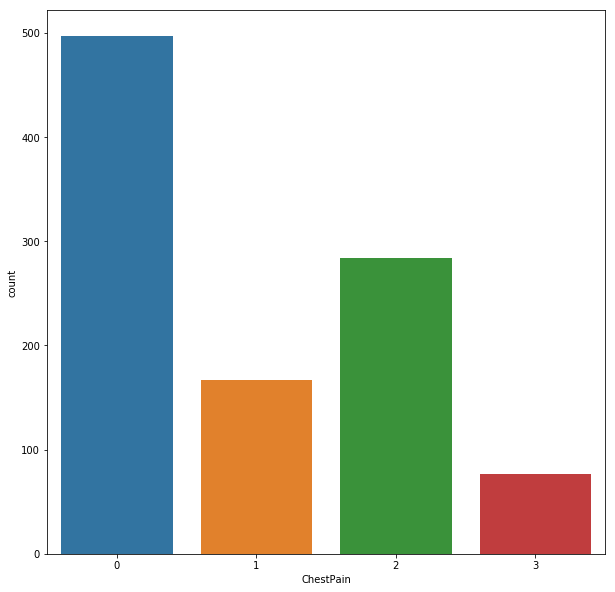

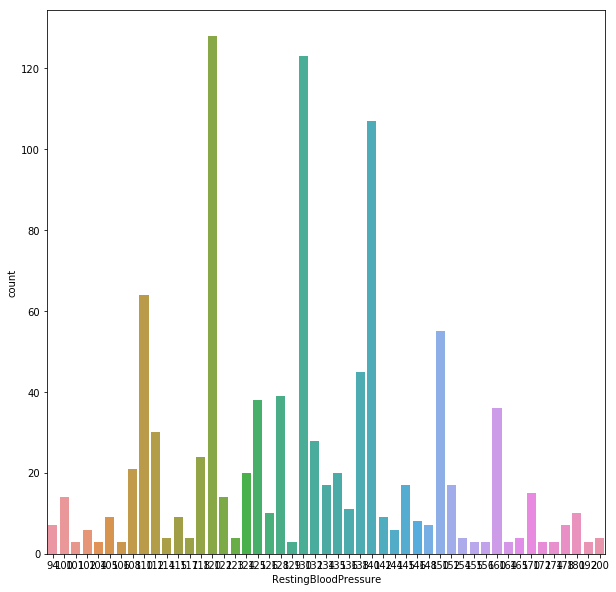

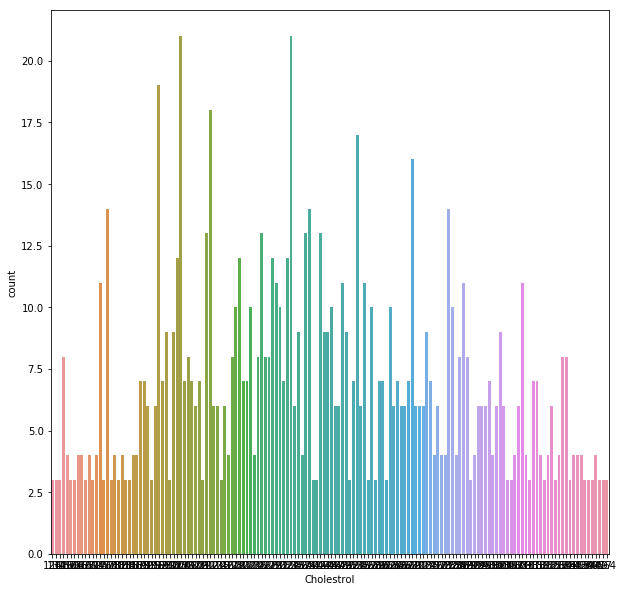

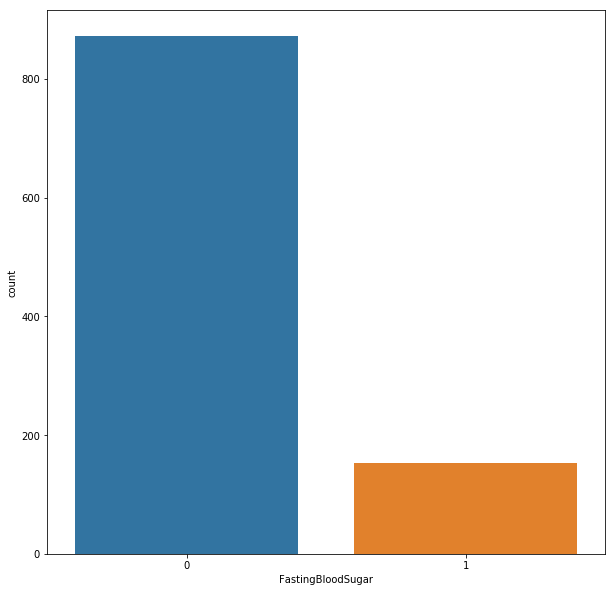

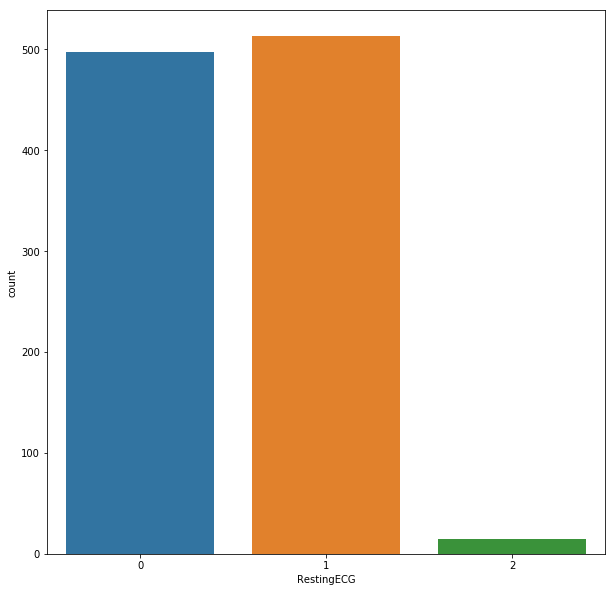

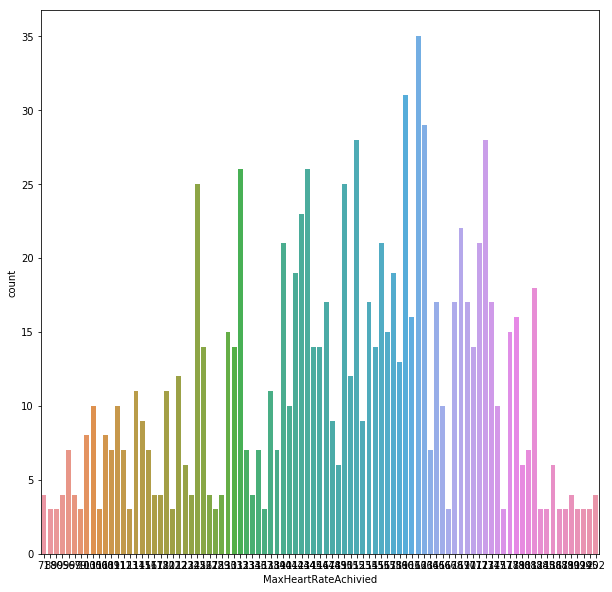

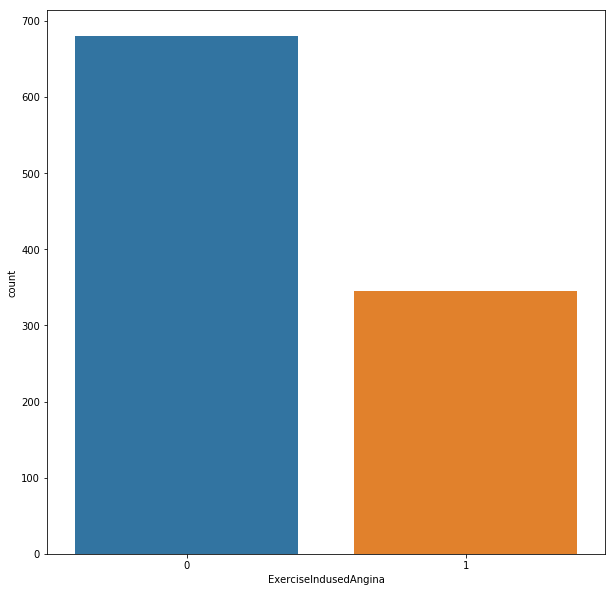

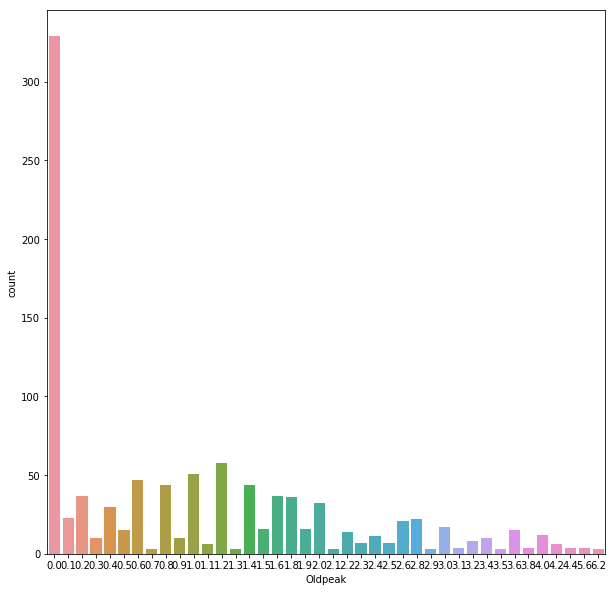

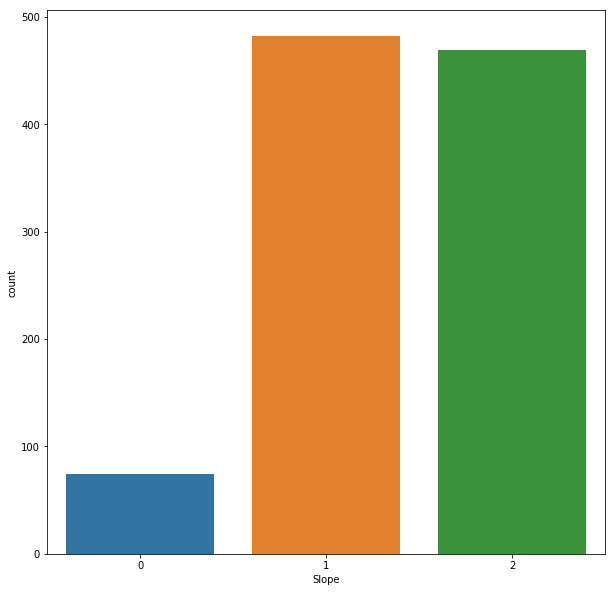

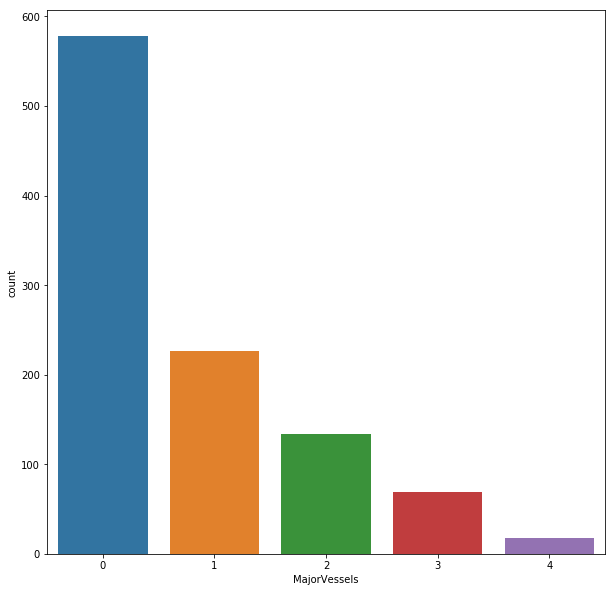

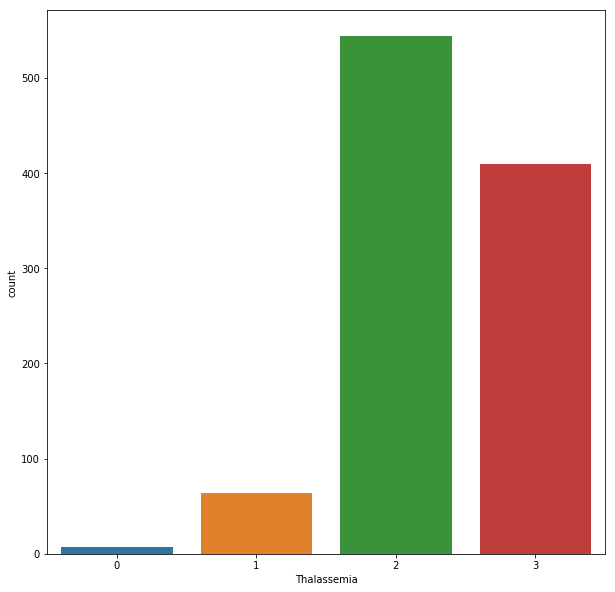

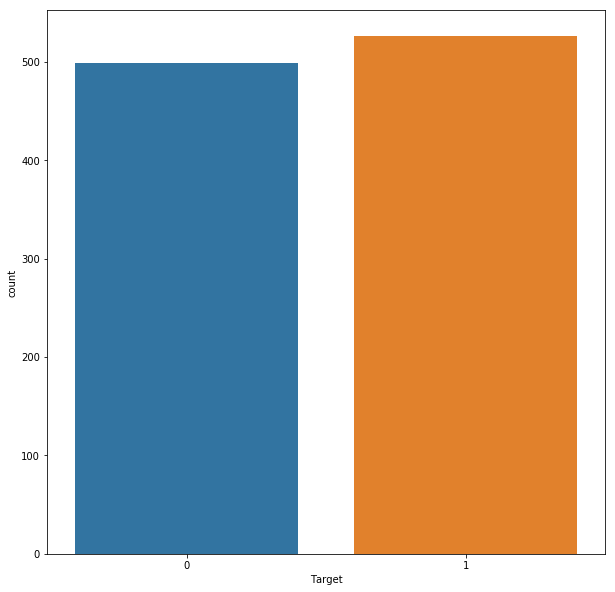

<Figure size 720x720 with 0 Axes>

In [2]:
# our goal is to try understand the data we got lets start 
# here we can see the info of each attribute  in the heart dataframe  as you can see it is not null 
#let us rename the colm we  have to be more understandable 
heart.columns = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']

arr=[]
fig=plt.figure(figsize=(10, 10))

for i in heart:
    ax=sns.countplot(x=i,data=heart)
    fig=plt.figure(figsize=(10, 10))


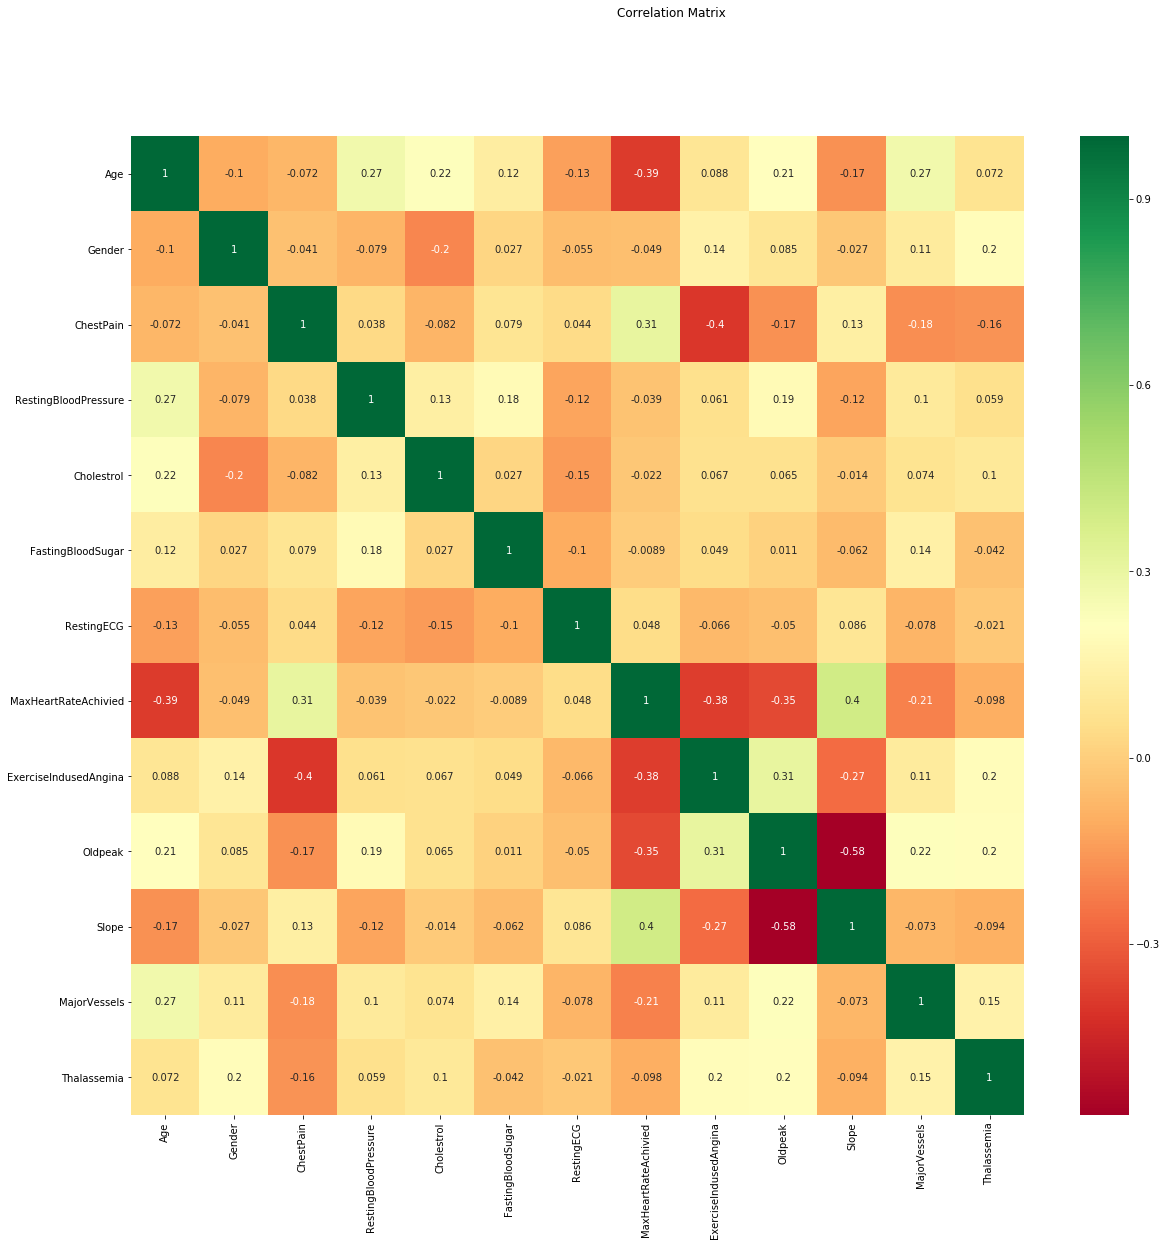

In [3]:

# this is the data plot of all the attrr counter of each value in attr 

sns.heatmap(heart[heart.columns[:13]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.suptitle('Correlation Matrix')
plt.savefig('new_plot/correlationofdata')

score:  0.8766233766233766
Error of logstic:   0.12337662337662336


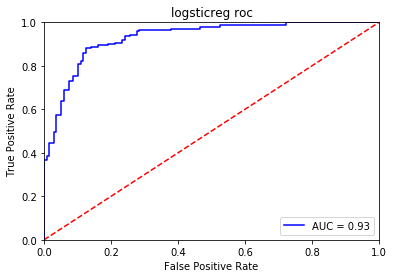

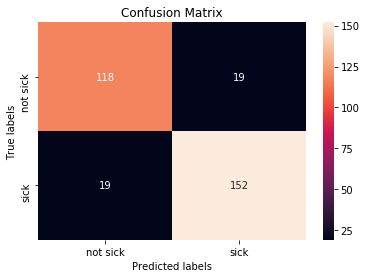


 clasification report:
    Accuracy  F1 score    Recall  Precision
1  0.876623  0.876623  0.888889   0.888889

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.86      0.86      0.86       137
        1.0       0.89      0.89      0.89       171

avg / total       0.88      0.88      0.88       308



In [4]:

#### lets know split the data we have in order to start the learning procsses 
heart.head()
X_data = heart.drop(columns=['Target'], axis=1)
Y = heart['Target']
#normalize the data
Y = ((Y - np.min(Y))/ (np.max(Y) - np.min(Y))).values
X = ((X_data - np.min(X_data)) / (np.max(X_data) - np.min(X_data))).values
# we want here to seprate the data for the learning procsses testdata=30% train 70 %
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

# let know use two type of classfication algortimm i will first use logstic regression 
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train, y_train)
pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
error_LR=1-score
print("score: ",score)
cmlogstic=confusion_matrix(y_test,pred)
# def result_score_of_model(model,ytest):    
def plot_heat(cm,title): 
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not sick', 'sick']); ax.yaxis.set_ticklabels(['not sick', 'sick']);
    plt.savefig('new_plot/'+title)
    plt.show()
    
print("Error of logstic:  ",error_LR)
def plot_roc(x_test,model,title):
    
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
plot_roc(x_test,logisticRegr,'logsticreg roc')
plot_heat(cmlogstic," logstic heatmap")
##
##############################################3
def get_report(y_test,pred):
    Report = [ (accuracy_score(y_test, pred),f1_score(y_test, pred, average='weighted')
                ,recall_score(y_test, pred), precision_score(y_test, pred))]
    dfObj = pd.DataFrame(Report, columns=['Accuracy', 'F1 score','Recall','Precision'], index=['1'])
    print('\n clasification report:\n', dfObj)   
    print ('\n clasification report for pair:\n', classification_report(y_test,pred))
get_report(y_test,pred)

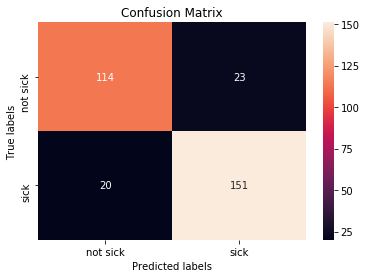

Accuracy for SVM kernel= rbf is 0.8603896103896104
report of  rbf

 clasification report:
    Accuracy  F1 score    Recall  Precision
1   0.86039  0.860224  0.883041   0.867816

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.85      0.83      0.84       137
        1.0       0.87      0.88      0.88       171

avg / total       0.86      0.86      0.86       308



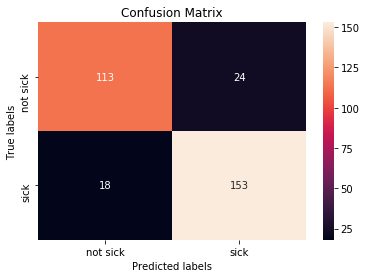

Accuracy for SVM kernel= linear is 0.8636363636363636
report of  linear

 clasification report:
    Accuracy  F1 score    Recall  Precision
1  0.863636  0.863285  0.894737   0.864407

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.86      0.82      0.84       137
        1.0       0.86      0.89      0.88       171

avg / total       0.86      0.86      0.86       308



In [5]:

# usin svm learning algotrim 
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(x_train,y_train)
#     predsvm=mo.predict(x_test)
    svm_prediction=model.predict(x_test)
    cmsvm=confusion_matrix(y_test,svm_prediction)
    plot_heat(cmsvm,i+' svm')
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(svm_prediction,y_test))
    print("report of ",i)
    get_report(y_test,svm_prediction)

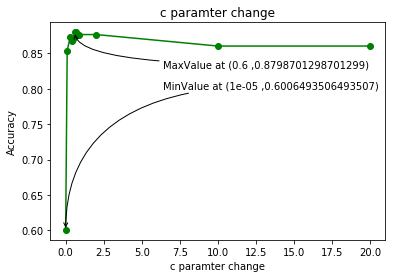

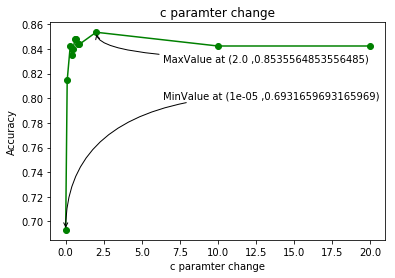

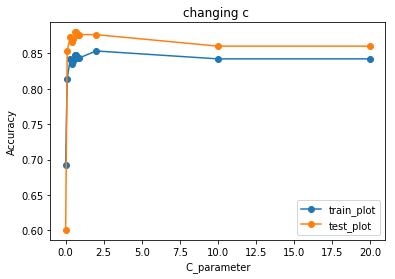

In [6]:

# know i want to play with the logstic regression paramter wwe will start with c 
# which is nverse of regularization strengt meaning we will force the theata value to be in spsfic range 
# let us start using the parmater we already have the train test above 


# let us start using the parmater we already have the train test above 


import pandas as pd
def get_max_min_scor_of(sepal_acc_table):
    maxem=sepal_acc_table[sepal_acc_table['Accuracy']==sepal_acc_table['Accuracy'].max()]
    minm=sepal_acc_table[sepal_acc_table['Accuracy']==sepal_acc_table['Accuracy'].min()]
    min_value=np.asarray(minm)
    max_value=np.asarray(maxem)
#     print(min_value)
    return max_value[0],min_value[0]
# def plot_two_grph(list1,list2,title,x_title,axis_range):
#     plt.plot(axis_range,list1)
# #     plt.plot(list1,marker='o',color='red' ,label="test_plot")

# #     plt.plot(list2,marker='o',color='black',label ="train_plot")
#     plt.axis=axis_range
#     plt.title(title)
#     plt.xlabel(x_title)
#     plt.ylabel('Accuracy')

#     plt.legend()
#     plt.show()
def plot_two_grph(list1,list2,title,x_title):
    plt.plot(list1,marker='o',color='red' ,label="test_plot")
    plt.plot(list2,marker='o',color='black',label ="trainplot")
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Accuracy')

    plt.legend()
    plt.show()
def plot_two_dict(dict1,dict2,title,x_title):
    plt.plot(list(dict1.keys()), list(dict1.values()),label="train_plot",marker='o')
#     plt.label("train")
    plt.plot(list(dict2.keys()), list(dict2.values()),label="test_plot",marker='o')
#     plt.label("test")

    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Accuracy')

    plt.legend()
    
def plot_x_y(x,y,title,taple):
    
    max_g_tol,min_g_tol=get_max_min_scor_of(sepal_acc_table)
    fig, ax = plt.subplots()
    ax.plot(x,y,marker='o', color='g')
    # naming the x axis 
    plt.xlabel(title) 
    # naming the y axis 
    plt.ylabel('Accuracy') 
    # giving a title to my graph 
    plt.title(title)
    text1='MaxValue at ('+ str(max_g_tol[0])+' ,'+ str(max_g_tol[1])+')'
    text2='MinValue at ('+ str(min_g_tol[0])+' ,'+ str(min_g_tol[1])+')'
    ax.annotate(text1, xy=max_g_tol, xytext=(6.4,0.83),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
    ax.annotate(text2, xy=min_g_tol, xytext=(6.4,0.80),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));
    plt.show()

j=0
def itr_throug_param(Logstic_parmter,name_of_par_col,paramlist,table,title,score_data_x,score_data_y):
    sepal_acc_table=table
    sepal_acc_table[name_of_par_col] = paramlist
    j=0
#     print(sepal_acc_table)
    for i in paramlist:
      # Apply logistic regression model to training data
        if(Logstic_parmter=='C'):
            lr = LogisticRegression(C= i,random_state = 0)
        if(Logstic_parmter=='tol'):
            lr = LogisticRegression(tol= i,random_state = 0)

        if(Logstic_parmter=='class_weight'):
            temp={0:i,1:1}
            lr = LogisticRegression(class_weight = temp,random_state = 0)
        lr.fit(x_train,y_train)
        y_pred_sepal = lr.predict(score_data_x)
    # Saving accuracy score in table
#         accuarc=accuracy_score(y_test,y_pred_sepal)
        sepal_acc_table.iloc[j,1] = accuracy_score(score_data_y,y_pred_sepal)
        j += 1
        x=sepal_acc_table[name_of_par_col]
        y=sepal_acc_table['Accuracy']
    plot_x_y(x,y,title,sepal_acc_table)
    copy_taple=sepal_acc_table.copy()
    
    ret=copy_taple.set_index(name_of_par_col).T.to_dict('list')
# c_table_train_dict=c_table_train.set_index('C_parameter').T.to_dict('list')
    return ret

C_param_range = [0.00001,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,2,10,20]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
c_table_test=itr_throug_param('C','C_parameter',C_param_range,sepal_acc_table,'c paramter change',x_test,y_test)
c_table_train=itr_throug_param('C','C_parameter',C_param_range,sepal_acc_table,'c paramter change',x_train,y_train)

# c_table_test_dict=c_table_test.set_index('C_parameter').T.to_dict('list')
# c_table_train_dict=c_table_train.set_index('C_parameter').T.to_dict('list')
plot_two_dict(c_table_train,c_table_test,'changing c ',' C_parameter ') # this wil plot the accuarcy changin in both train and test 
    
    
# plot_two_grph(c_table_test_dict,c_table_train_dict,'title','x_title',C_param_range)




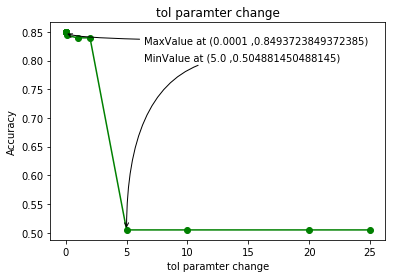

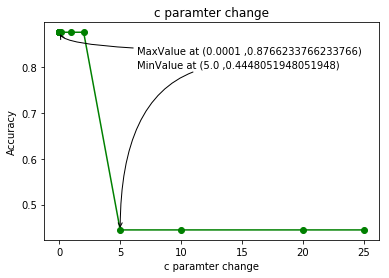

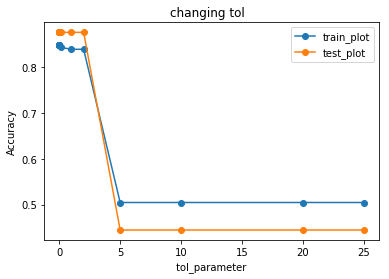

In [7]:
### i want to check the tolerance value changes 
tol_par = [0.0001,0.00001,0.00005,0.000003,0.0001,0.001,0.01,0.1,1,2,5,10,20,25]
sepal_acc_table = pd.DataFrame(columns = ['tol_par','Accuracy'])
sepal_acc_table['tol_par'] = tol_par
# tol_table=itr_throug_param('tol','tol_par',tol_par,sepal_acc_table,'tol paramter change')
tol_table_train=itr_throug_param('tol','tol_par',tol_par,sepal_acc_table,'tol paramter change',x_train,y_train)
tol_table_test=itr_throug_param('tol','tol_par',tol_par,sepal_acc_table,'c paramter change',x_test,y_test)
plot_two_dict(tol_table_train,tol_table_test,'changing tol  ',' tol_parameter ') # this wil plot the accuarcy changin in both train and test 
        


# plot_x_y(x,y," graph for accuracy of changing tol par ",sepal_acc_table)

# print(sepal_acc_table)

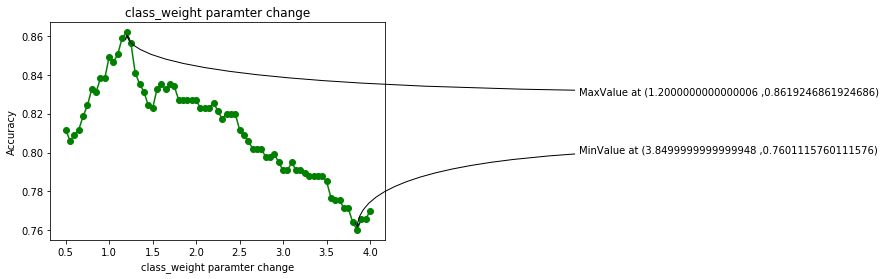

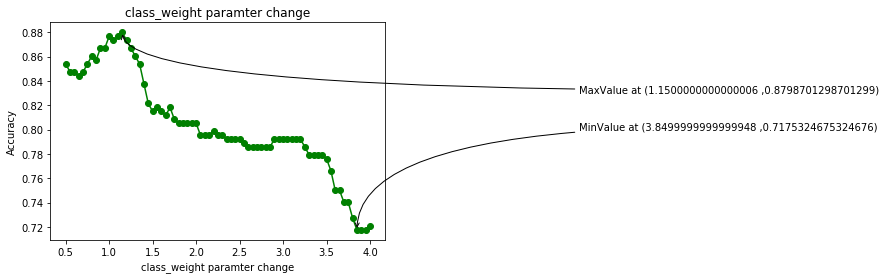

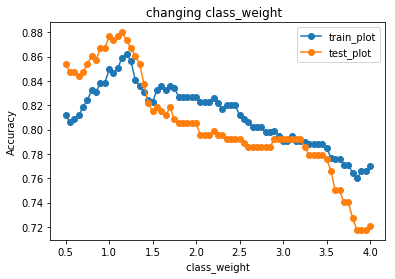

In [8]:
# class_weight="balanced"
## so lets check the target arrange we have 
def drange(x, y, jump):
      while x < y:
            yield float(x)
            x += jump
sepal_acc_table = pd.DataFrame(columns = ['Class_w','Accuracy'])         
class_w1= drange(0.5, 4,0.05)
class_w1=[x for x in class_w1]
sepal_acc_table['Class_w'] = class_w1
# heart['Target'].value_counts()
class_w2= drange(1, 2,0.1)
index=0
# w_table=itr_throug_param('class_weight','Class_w',class_w1,sepal_acc_table,'class wight paramter change',x_data,y_data)
w_table_train=itr_throug_param('class_weight','Class_w',class_w1,sepal_acc_table,'class_weight paramter change',x_train,y_train)
w_table_test=itr_throug_param('class_weight','Class_w',class_w1,sepal_acc_table,'class_weight paramter change',x_test,y_test)
plot_two_dict(w_table_train,w_table_test,'changing class_weight  ',' class_weight ') # this wil plot the accuarcy changin in both train and test 
        


# x=w_table['Class_w']
# y=w_table['Accuracy']
# plot_x_y(x,y,'class wight paramter change',sepal_acc_table)
# print(w_table)

In [9]:
### so know we want to do for svc 

   # Apply logistic regression model to training data
# max_w,min_w=get_max_min_scor_of(w_table_train)
import operator
max_w=max(w_table_train.items(), key=operator.itemgetter(1))[0]
max_c=max(c_table_train.items(), key=operator.itemgetter(1))[0]
max_tol=max(tol_table_train.items(), key=operator.itemgetter(1))[0]

print("____",max_w)
print("max class_weight is ",max_w)
# max_c,min_c=get_max_min_scor_of(c_table_train)
print("max C_parmeter is  ",max_c)
# max_tol,min_tol=get_max_min_scor_of(tol_table_train)
print("max Tol_parmeter is  ",max_tol)

temp={0:max_w,1:1}

lrn = LogisticRegression(tol=max_tol,C=max_c,class_weight = temp)
lrn.fit(x_train,y_train)
score=lrn.score(x_test,y_test)
# score=lrn.score(x_train,y_train)

print('the logstic regresstion score is: ')
print(score)

____ 1.2000000000000006
max class_weight is  1.2000000000000006
max C_parmeter is   2.0
max Tol_parmeter is   0.0001
the logstic regresstion score is: 
0.8766233766233766


In [12]:
### know i want to use all the paramter of class wight and c paramte and tol to check which is the best 
# C_param_range,tol_par,class_w1
### note we handeld the overfiting by chosing c 0.3 which did give us better 
def get_score_with_defer_par(C_param_range,tol_par,class_w1):
    score_list=[]
    dictlist={}
    for c in C_param_range:
        for tol in tol_par:
            for w in class_w1:
                temp_w={0:w,1:1}    
                lr = LogisticRegression(C=c,tol=tol,class_weight=temp_w,random_state = 0,penalty='l2')
                lr.fit(x_train,y_train)
                score=lr.score(x_test,y_test)
                dict1={"c_par":c,"w":w,"tol":tol}
                score_dict={score:dict1}
                dictlist[score] = dict1
                score_list.append(score)
                
    return score_list,dictlist
score,dictlist=get_score_with_defer_par(C_param_range,tol_par,class_w1)
key_list = list(dictlist.keys()) 
val_list = list(dictlist.values()) 
values=(key_list)
max_index= key_list.index(max(key_list))
temp_dict=val_list[max_index]
cm=temp_dict['c_par']
wm=temp_dict['w']
tol=temp_dict['tol']
print("C_parmters: ",cm,"Tol_parmter: ",tol,"ClassWeight_parmter: ",wm)
print("the best score we got: ",max(score))

C_parmters:  0.9 Tol_parmter:  0.01 ClassWeight_parmter:  1.1500000000000006
the best score we got:  0.8798701298701299


 test score 0.7564935064935064 train_score 0.6861924686192469
 test score 0.7824675324675324 train_score 0.6931659693165969
 test score 0.7792207792207793 train_score 0.7266387726638772
 test score 0.827922077922078 train_score 0.7782426778242678
 test score 0.8409090909090909 train_score 0.8117154811715481
 test score 0.8344155844155844 train_score 0.8186889818688982
 test score 0.8441558441558441 train_score 0.8451882845188284
 test score 0.8474025974025974 train_score 0.8493723849372385
 test score 0.8474025974025974 train_score 0.8451882845188284
 test score 0.8441558441558441 train_score 0.8396094839609484
 test score 0.8798701298701299 train_score 0.8549511854951185
 test score 0.8798701298701299 train_score 0.8591352859135286
 test score 0.8798701298701299 train_score 0.8591352859135286


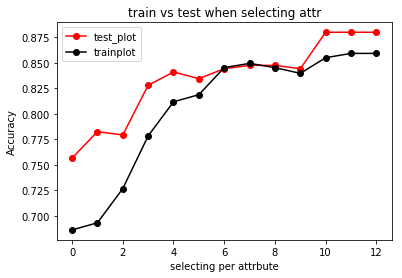

In [11]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
temp_w={0:wm,1:1}
model=LogisticRegression(C=cm,tol=tol,class_weight=temp_w,random_state = 0)
attr_col = ['Age', 'Gender', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia']
used_bool=[]
def get_best_attr_with_score(model,x_test,y_test,attr_col,k):
    X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
#     estimator = SVR(kernel="linear")
    selector = RFE(model, k, step=1)
    selector = selector.fit(x_train, y_train)
    selector.support_
    
    selector.ranking_
    our_selected_attr=selector.get_support()
    list_attr_se=[]
    score=selector.score(x_test,y_test)
    for i ,j in zip(our_selected_attr,attr_col):
        if(i==True):
            list_attr_se.append(j)
    return score,list_attr_se

def get_score_list_attr(model,x_test,y_test,attr_col):
    scores_of_kattr=[]
    dict_attr={}
    scores_of_kattr__train=[]
    dict_attr_train={}
    for i in range(0,len(attr_col)):
        score,attr_list=get_best_attr_with_score(model,x_test,y_test,attr_col,i+1)
        score_train,attr_list_train=get_best_attr_with_score(model,x_train,y_train,attr_col,i+1)
        print(" test score",score,"train_score",score_train)
        scores_of_kattr.append(score)
        dict_attr[i] = attr_list
        scores_of_kattr__train.append(score_train)
        dict_attr_train[i] = attr_list_train
    return scores_of_kattr,dict_attr,scores_of_kattr__train,dict_attr_train
attr_score,attr_list,attr_score_train,attr_list_train=get_score_list_attr(model,x_test,y_test,attr_col)
# x_range=[x for i in range(1,len(attr_col))]

plot_two_grph(attr_score,attr_score_train,'train vs test when selecting attr','selecting per attrbute')
# show(legend)
# plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
#          label="KRR")

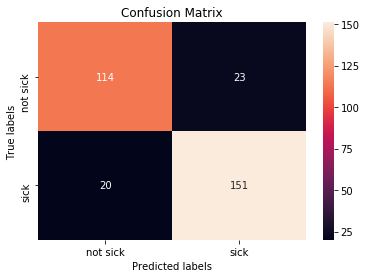

Accuracy for SVM kernel= rbf is 0.8603896103896104
report of  rbf

 clasification report:
    Accuracy  F1 score    Recall  Precision
1   0.86039  0.860224  0.883041   0.867816

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.85      0.83      0.84       137
        1.0       0.87      0.88      0.88       171

avg / total       0.86      0.86      0.86       308



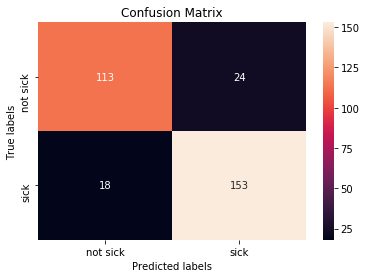

Accuracy for SVM kernel= linear is 0.8636363636363636
report of  linear

 clasification report:
    Accuracy  F1 score    Recall  Precision
1  0.863636  0.863285  0.894737   0.864407

 clasification report for pair:
              precision    recall  f1-score   support

        0.0       0.86      0.82      0.84       137
        1.0       0.86      0.89      0.88       171

avg / total       0.86      0.86      0.86       308



In [15]:
#### know lets us explore another classfication algortim svm 
#  usin svm learning algotrim 
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(x_train,y_train)
#     predsvm=mo.predict(x_test)
    svm_prediction=model.predict(x_test)
    cmsvm=confusion_matrix(y_test,svm_prediction)
    plot_heat(cmsvm,i+' svm')
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(svm_prediction,y_test))
    print("report of ",i)
    get_report(y_test,svm_prediction)